# Get Data

In [ ]:
!git clone https://github.com/Franck-Dernoncourt/pubmed-rct.git
!ls pubmed-rct

Cloning into 'pubmed-rct'...
remote: Enumerating objects: 33, done.
remote: Counting objects: 100% (8/8), done.
remote: Compressing objects: 100% (3/3), done.
remote: Total 33 (delta 5), reused 5 (delta 5), pack-reused 25
Unpacking objects: 100% (33/33), done.
Checking out files: 100% (13/13), done.
PubMed_200k_RCT
PubMed_200k_RCT_numbers_replaced_with_at_sign
PubMed_20k_RCT
PubMed_20k_RCT_numbers_replaced_with_at_sign
README.md


In [ ]:
# Check what files are in the PubMed_20K dataset 
!ls pubmed-rct/PubMed_20k_RCT_numbers_replaced_with_at_sign

dev.txt  test.txt  train.txt


In [ ]:
# Start by using the 20k dataset
data_dir = "pubmed-rct/PubMed_20k_RCT_numbers_replaced_with_at_sign/"

In [ ]:
# Check all of the filenames in the target directory
import os
filenames = [data_dir + filename for filename in os.listdir(data_dir)]
filenames

['pubmed-rct/PubMed_20k_RCT_numbers_replaced_with_at_sign/test.txt',
 'pubmed-rct/PubMed_20k_RCT_numbers_replaced_with_at_sign/dev.txt',
 'pubmed-rct/PubMed_20k_RCT_numbers_replaced_with_at_sign/train.txt']

In [ ]:
# Create function to read the lines of a document
def get_lines(filename):
  """
  Reads filename (a text file) and returns the lines of text as a list.
  
  Args:
      filename: a string containing the target filepath to read.
  
  Returns:
      A list of strings with one string per line from the target filename.
      For example:
      ["this is the first line of filename",
       "this is the second line of filename",
       "..."]
  """
  with open(filename, "r") as f:
    return f.readlines()

In [ ]:
train_lines = get_lines(data_dir+"train.txt")
train_lines[:20] # the whole first example of an abstract + a little more of the next one

['###24293578\n',
 'OBJECTIVE\tTo investigate the efficacy of @ weeks of daily low-dose oral prednisolone in improving pain , mobility , and systemic low-grade inflammation in the short term and whether the effect would be sustained at @ weeks in older adults with moderate to severe knee osteoarthritis ( OA ) .\n',
 'METHODS\tA total of @ patients with primary knee OA were randomized @:@ ; @ received @ mg/day of prednisolone and @ received placebo for @ weeks .\n',
 'METHODS\tOutcome measures included pain reduction and improvement in function scores and systemic inflammation markers .\n',
 'METHODS\tPain was assessed using the visual analog pain scale ( @-@ mm ) .\n',
 'METHODS\tSecondary outcome measures included the Western Ontario and McMaster Universities Osteoarthritis Index scores , patient global assessment ( PGA ) of the severity of knee OA , and @-min walk distance ( @MWD ) .\n',
 'METHODS\tSerum levels of interleukin @ ( IL-@ ) , IL-@ , tumor necrosis factor ( TNF ) - , and 

In [ ]:
def preprocess_text_with_line_numbers(filename):
  """Returns a list of dictionaries of abstract line data.

  Takes in filename, reads its contents and sorts through each line,
  extracting things like the target label, the text of the sentence,
  how many sentences are in the current abstract and what sentence number
  the target line is.

  Args:
      filename: a string of the target text file to read and extract line data
      from.

  Returns:
      A list of dictionaries each containing a line from an abstract,
      the lines label, the lines position in the abstract and the total number
      of lines in the abstract where the line is from. For example:

      [{"target": 'CONCLUSION',
        "text": The study couldn't have gone better, turns out people are kinder than you think",
        "line_number": 8,
        "total_lines": 8}]
  """
  input_lines = get_lines(filename) # get all lines from filename
  abstract_lines = "" # create an empty abstract
  abstract_samples = [] # create an empty list of abstracts
  
  # Loop through each line in target file
  for line in input_lines:
    if line.startswith("###"): # check to see if line is an ID line
      abstract_id = line
      abstract_lines = "" # reset abstract string
    elif line.isspace(): # check to see if line is a new line
      abstract_line_split = abstract_lines.splitlines() # split abstract into separate lines

      # Iterate through each line in abstract and count them at the same time
      for abstract_line_number, abstract_line in enumerate(abstract_line_split):
        line_data = {} # create empty dict to store data from line
        target_text_split = abstract_line.split("\t") # split target label from text
        line_data["target"] = target_text_split[0] # get target label
        line_data["text"] = target_text_split[1].lower() # get target text and lower it
        line_data["line_number"] = abstract_line_number # what number line does the line appear in the abstract?
        line_data["total_lines"] = len(abstract_line_split) - 1 # how many total lines are in the abstract? (start from 0)
        abstract_samples.append(line_data) # add line data to abstract samples list
    
    else: # if the above conditions aren't fulfilled, the line contains a labelled sentence
      abstract_lines += line
  
  return abstract_samples

In [ ]:
# Get data from file and preprocess it
%%time
train_samples = preprocess_text_with_line_numbers(data_dir + "train.txt")
val_samples = preprocess_text_with_line_numbers(data_dir + "dev.txt") # dev is another name for validation set
test_samples = preprocess_text_with_line_numbers(data_dir + "test.txt")

CPU times: user 537 ms, sys: 123 ms, total: 660 ms
Wall time: 668 ms


In [ ]:
len(train_samples), len(val_samples), len(test_samples)

(180040, 30212, 30135)

In [ ]:
# Check the first abstract of our training data
train_samples[:14]

[{'line_number': 0,
  'target': 'OBJECTIVE',
  'text': 'to investigate the efficacy of @ weeks of daily low-dose oral prednisolone in improving pain , mobility , and systemic low-grade inflammation in the short term and whether the effect would be sustained at @ weeks in older adults with moderate to severe knee osteoarthritis ( oa ) .',
  'total_lines': 11},
 {'line_number': 1,
  'target': 'METHODS',
  'text': 'a total of @ patients with primary knee oa were randomized @:@ ; @ received @ mg/day of prednisolone and @ received placebo for @ weeks .',
  'total_lines': 11},
 {'line_number': 2,
  'target': 'METHODS',
  'text': 'outcome measures included pain reduction and improvement in function scores and systemic inflammation markers .',
  'total_lines': 11},
 {'line_number': 3,
  'target': 'METHODS',
  'text': 'pain was assessed using the visual analog pain scale ( @-@ mm ) .',
  'total_lines': 11},
 {'line_number': 4,
  'target': 'METHODS',
  'text': 'secondary outcome measures include

In [ ]:
import pandas as pd
train_df = pd.DataFrame(train_samples)
val_df = pd.DataFrame(val_samples)
test_df = pd.DataFrame(test_samples)
train_df.head(14)

,target,text,line_number,total_lines
0,OBJECTIVE,to investigate the efficacy of @ weeks of dail...,0,11
1,METHODS,a total of @ patients with primary knee oa wer...,1,11
2,METHODS,outcome measures included pain reduction and i...,2,11
3,METHODS,pain was assessed using the visual analog pain...,3,11
4,METHODS,secondary outcome measures included the wester...,4,11
5,METHODS,"serum levels of interleukin @ ( il-@ ) , il-@ ...",5,11
6,RESULTS,there was a clinically relevant reduction in t...,6,11
7,RESULTS,the mean difference between treatment arms ( @...,7,11
8,RESULTS,"further , there was a clinically relevant redu...",8,11
9,RESULTS,these differences remained significant at @ we...,9,11


In [ ]:
# Distribution of labels in training data
train_df.target.value_counts()

METHODS        59353
RESULTS        57953
CONCLUSIONS    27168
BACKGROUND     21727
OBJECTIVE      13839
Name: target, dtype: int64

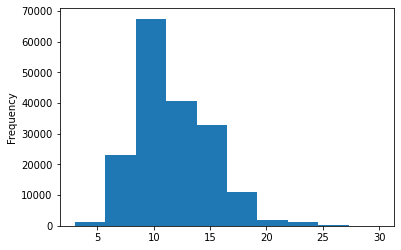

In [ ]:
train_df.total_lines.plot.hist();

In [ ]:
# Convert abstract text lines into lists 
train_sentences = train_df["text"].tolist()
val_sentences = val_df["text"].tolist()
test_sentences = test_df["text"].tolist()
len(train_sentences), len(val_sentences), len(test_sentences)

(180040, 30212, 30135)

In [ ]:
# View first 10 lines of training sentences
train_sentences[:10]

['to investigate the efficacy of @ weeks of daily low-dose oral prednisolone in improving pain , mobility , and systemic low-grade inflammation in the short term and whether the effect would be sustained at @ weeks in older adults with moderate to severe knee osteoarthritis ( oa ) .',
 'a total of @ patients with primary knee oa were randomized @:@ ; @ received @ mg/day of prednisolone and @ received placebo for @ weeks .',
 'outcome measures included pain reduction and improvement in function scores and systemic inflammation markers .',
 'pain was assessed using the visual analog pain scale ( @-@ mm ) .',
 'secondary outcome measures included the western ontario and mcmaster universities osteoarthritis index scores , patient global assessment ( pga ) of the severity of knee oa , and @-min walk distance ( @mwd ) .',
 'serum levels of interleukin @ ( il-@ ) , il-@ , tumor necrosis factor ( tnf ) - , and high-sensitivity c-reactive protein ( hscrp ) were measured .',
 'there was a clinic

Make numeric labels (ML models require numeric labels)

In [ ]:
# One hot encode labels
from sklearn.preprocessing import OneHotEncoder
one_hot_encoder = OneHotEncoder(sparse=False)
train_labels_one_hot = one_hot_encoder.fit_transform(train_df["target"].to_numpy().reshape(-1, 1))
val_labels_one_hot = one_hot_encoder.transform(val_df["target"].to_numpy().reshape(-1, 1))
test_labels_one_hot = one_hot_encoder.transform(test_df["target"].to_numpy().reshape(-1, 1))

# Check what training labels look like
train_labels_one_hot, train_labels_one_hot.shape

(array([[0., 0., 0., 1., 0.],
        [0., 0., 1., 0., 0.],
        [0., 0., 1., 0., 0.],
        ...,
        [0., 0., 0., 0., 1.],
        [0., 1., 0., 0., 0.],
        [0., 1., 0., 0., 0.]]), (180040, 5))

In [ ]:
# Extract labels ("target" columns) and encode them into integers 
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
train_labels_encoded = label_encoder.fit_transform(train_df["target"].to_numpy())
val_labels_encoded = label_encoder.transform(val_df["target"].to_numpy())
test_labels_encoded = label_encoder.transform(test_df["target"].to_numpy())

# Check what training labels look like
train_labels_encoded

array([3, 2, 2, ..., 4, 1, 1])

In [ ]:
# Get class names and number of classes from LabelEncoder instance 
num_classes = len(label_encoder.classes_)
class_names = label_encoder.classes_
num_classes, class_names

(5, array(['BACKGROUND', 'CONCLUSIONS', 'METHODS', 'OBJECTIVE', 'RESULTS'],
       dtype=object))

Model 0: Getting a baseline

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import Pipeline

model_0 = Pipeline([
                    ('tf-idf', TfidfVectorizer()),
                    ('classifier', MultinomialNB())
])

model_0.fit(X=train_sentences, 
            y=train_labels_encoded)

Pipeline(steps=[('tf-idf', TfidfVectorizer()), ('classifier', MultinomialNB())])

In [ ]:
# Evaluate baseline on validation dataset
model_0.score(X=val_sentences,
              y=val_labels_encoded)

0.7218323844829869

In [ ]:
# Make predictions
baseline_preds = model_0.predict(val_sentences)
baseline_preds

array([4, 1, 3, ..., 4, 4, 1])

In [ ]:
!wget "https://raw.githubusercontent.com/HemachandranD/tensorflow-deep-learning/main/extras/helper_functions.py"

--2022-08-09 08:33:01--  https://raw.githubusercontent.com/HemachandranD/tensorflow-deep-learning/main/extras/helper_functions.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.110.133, 185.199.108.133, 185.199.111.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.110.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 10246 (10K) [text/plain]
Saving to: ‘helper_functions.py’

helper_functions.py 100%[===================>]  10.01K  --.-KB/s    in 0s      

2022-08-09 08:33:01 (95.8 MB/s) - ‘helper_functions.py’ saved [10246/10246]



In [ ]:
# Import calculate_results helper function
from helper_functions import calculate_results

# Calculate baseline results
baseline_results = calculate_results(y_true=val_labels_encoded,
                                     y_pred=baseline_preds)
baseline_results

{'accuracy': 72.1832384482987,
 'f1': 0.6989250353450294,
 'precision': 0.7186466952323352,
 'recall': 0.7218323844829869}

Preparing our data for deep sequence models

In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow.keras import layers

In [ ]:
# How long is each sentence on average?
sent_lens = [len(sentence.split()) for sentence in train_sentences]
avg_sent_len = np.mean(sent_lens)
avg_sent_len # return average sentence length (in tokens)

26.338269273494777

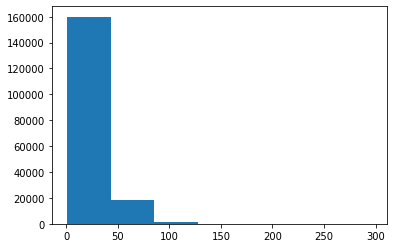

In [ ]:
# What's the distribution look like?
import matplotlib.pyplot as plt
plt.hist(sent_lens, bins=7);

In [ ]:
output_seq_len = np.percentile(sent_lens, 95)
output_seq_len

55.0

In [ ]:
max(sent_lens)

296

Hardly any sentences even come close to the max length, it would mean the majority of the data we pass to our model would be zeros (sinces all sentences below the max length would get padded with zeros).

In [ ]:
# How many words are in our vocabulary? (taken from 3.2 in https://arxiv.org/pdf/1710.06071.pdf)
max_tokens = 68000

# Create text vectorizer
from tensorflow.keras.layers.experimental.preprocessing import TextVectorization

text_vectorizer = TextVectorization(max_tokens=max_tokens, # number of words in vocabulary
                                    output_sequence_length=55) # desired output length of vectorized sequences

In [ ]:
# Adapt text vectorizer to training sentences
text_vectorizer.adapt(train_sentences)

In [ ]:
# Test out text vectorizer
import random
target_sentence = random.choice(train_sentences)
print(f"Text:\n{target_sentence}")
print(f"\nLength of text: {len(target_sentence.split())}")
print(f"\nVectorized text:\n{text_vectorizer([target_sentence])}")

Text:
influenza a ( h@n@ ) - and laiv-naive subjects received either @ or @ doses of isiv .

Length of text: 18

Vectorized text:
[[ 1289     8  2550     3 53997   104    80   132    16   321     4 20359
      0     0     0     0     0     0     0     0     0     0     0     0
      0     0     0     0     0     0     0     0     0     0     0     0
      0     0     0     0     0     0     0     0     0     0     0     0
      0     0     0     0     0     0     0]]


In [ ]:
# How many words in our training vocabulary?
rct_20k_text_vocab = text_vectorizer.get_vocabulary()
print(f"Number of words in vocabulary: {len(rct_20k_text_vocab)}"), 
print(f"Most common words in the vocabulary: {rct_20k_text_vocab[:5]}")
print(f"Least common words in the vocabulary: {rct_20k_text_vocab[-5:]}")

Number of words in vocabulary: 64841
Most common words in the vocabulary: ['', '[UNK]', 'the', 'and', 'of']
Least common words in the vocabulary: ['aainduced', 'aaigroup', 'aachener', 'aachen', 'aaacp']


In [ ]:
# Get the config of our text vectorizer
text_vectorizer.get_config()

{'batch_input_shape': (None,),
 'dtype': 'string',
 'idf_weights': None,
 'max_tokens': 68000,
 'name': 'text_vectorization',
 'ngrams': None,
 'output_mode': 'int',
 'output_sequence_length': 55,
 'pad_to_max_tokens': False,
 'ragged': False,
 'sparse': False,
 'split': 'whitespace',
 'standardize': 'lower_and_strip_punctuation',
 'trainable': True,
 'vocabulary': None}

Create custom text embedding

In [ ]:
# Create token embedding layer
token_embed = layers.Embedding(input_dim=len(rct_20k_text_vocab), # length of vocabulary
                               output_dim=128, # Note: different embedding sizes result in drastically different numbers of parameters to train
                               # Use masking to handle variable sequence lengths (save space)
                               mask_zero=True,
                               name="token_embedding") 

# Show example embedding
print(f"Sentence before vectorization:\n{target_sentence}\n")
vectorized_sentence = text_vectorizer([target_sentence])
print(f"Sentence after vectorization (before embedding):\n{vectorized_sentence}\n")
embedded_sentence = token_embed(vectorized_sentence)
print(f"Sentence after embedding:\n{embedded_sentence}\n")
print(f"Embedded sentence shape: {embedded_sentence.shape}")

Sentence before vectorization:
influenza a ( h@n@ ) - and laiv-naive subjects received either @ or @ doses of isiv .

Sentence after vectorization (before embedding):
[[ 1289     8  2550     3 53997   104    80   132    16   321     4 20359
      0     0     0     0     0     0     0     0     0     0     0     0
      0     0     0     0     0     0     0     0     0     0     0     0
      0     0     0     0     0     0     0     0     0     0     0     0
      0     0     0     0     0     0     0]]

Sentence after embedding:
[[[ 0.01172734  0.03488261 -0.04875274 ...  0.00596871 -0.01735223
   -0.02118996]
  [-0.03260794 -0.01148202  0.03490352 ... -0.02993006  0.02432675
   -0.02243209]
  [ 0.01904068 -0.03595297  0.00324954 ... -0.0371789  -0.02178892
   -0.015674  ]
  ...
  [-0.0423024  -0.01251423 -0.03125224 ... -0.04165999 -0.03976498
   -0.01869686]
  [-0.0423024  -0.01251423 -0.03125224 ... -0.04165999 -0.03976498
   -0.01869686]
  [-0.0423024  -0.01251423 -0.03125224 ... 

Create datasets for performance

In [ ]:
# Turn our data into TensorFlow Datasets
train_dataset= tf.data.Dataset.from_tensor_slices((train_sentences, train_labels_one_hot))
valid_dataset= tf.data.Dataset.from_tensor_slices((val_sentences, val_labels_one_hot))
test_dataset= tf.data.Dataset.from_tensor_slices((test_sentences, test_labels_one_hot))

train_dataset

<TensorSliceDataset element_spec=(TensorSpec(shape=(), dtype=tf.string, name=None), TensorSpec(shape=(5,), dtype=tf.float64, name=None))>

In [ ]:
# Take the TensorSliceDataset's and turn them into prefetched batches
train_dataset= train_dataset.batch(32).prefetch(tf.data.AUTOTUNE)
valid_dataset= valid_dataset.batch(32).prefetch(tf.data.AUTOTUNE)
test_dataset= test_dataset.batch(32).prefetch(tf.data.AUTOTUNE)

train_dataset

<PrefetchDataset element_spec=(TensorSpec(shape=(None,), dtype=tf.string, name=None), TensorSpec(shape=(None, 5), dtype=tf.float64, name=None))>

Build an 1-Dimensional convolution Neural network

In [ ]:
# Create 1D convolutional model to process sequences
from tensorflow.keras import layers
import tensorflow as tf

inputs = layers.Input(shape=(1,), dtype=tf.string)
text_vectors= text_vectorizer(inputs)
token_embeddings =token_embed(text_vectors)
x= layers.Conv1D(64, kernel_size=5, padding="same", activation="relu")(token_embeddings)
x= layers.GlobalAveragePooling1D()(x)
outputs= layers.Dense(num_classes, activation='softmax')(x)
model_1 = tf.keras.Model(inputs, outputs)

model_1.compile(loss='categorical_crossentropy',
                optimizer= tf.keras.optimizers.Adam(),
                metrics=['accuracy'])

In [ ]:
model_1.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 1)]               0         
                                                                 
 text_vectorization (TextVec  (None, 55)               0         
 torization)                                                     
                                                                 
 token_embedding (Embedding)  (None, 55, 128)          8299648   
                                                                 
 conv1d (Conv1D)             (None, 55, 64)            41024     
                                                                 
 global_average_pooling1d (G  (None, 64)               0         
 lobalAveragePooling1D)                                          
                                                                 
 dense (Dense)               (None, 5)                 325   

In [ ]:
# Fit the model
model_1_history = model_1.fit(train_dataset,
                              steps_per_epoch=int(0.1 * len(train_dataset)), # only fit on 10% of batches for faster training time
                              epochs=3,
                              validation_data=valid_dataset,
                              validation_steps=int(0.1 * len(valid_dataset))) # only validate on 10% of batches

Epoch 1/3
562/562 [==============================] - 60s 104ms/step - loss: 0.9204 - accuracy: 0.6359 - val_loss: 0.6854 - val_accuracy: 0.7387
Epoch 2/3
562/562 [==============================] - 58s 104ms/step - loss: 0.6591 - accuracy: 0.7558 - val_loss: 0.6331 - val_accuracy: 0.7683
Epoch 3/3
562/562 [==============================] - 59s 106ms/step - loss: 0.6176 - accuracy: 0.7739 - val_loss: 0.5939 - val_accuracy: 0.7839


In [ ]:
# Evaluate on whole validation dataset (we only validated on 10% of batches during training)
model_1.evaluate(valid_dataset)

945/945 [==============================] - 6s 6ms/step - loss: 0.5963 - accuracy: 0.7860


[0.5963332653045654, 0.786045253276825]

In [ ]:
# Make predictions (our model outputs prediction probabilities for each class)
model_1_pred_probs = model_1.predict(valid_dataset)
model_1_pred_probs

array([[4.0676227e-01, 2.2662486e-01, 6.3553058e-02, 2.6551351e-01,
        3.7546296e-02],
       [4.3692082e-01, 3.0977517e-01, 1.4017777e-02, 2.2960153e-01,
        9.6846456e-03],
       [1.6269588e-01, 4.9781124e-03, 2.3066287e-03, 8.2996202e-01,
        5.7254132e-05],
       ...,
       [4.9803702e-06, 6.4940483e-04, 7.7819516e-04, 2.2510565e-06,
        9.9856514e-01],
       [5.4702636e-02, 5.0250036e-01, 6.4489089e-02, 5.8181163e-02,
        3.2012680e-01],
       [2.0081602e-01, 6.3281965e-01, 5.6849036e-02, 5.1796176e-02,
        5.7719089e-02]], dtype=float32)

In [ ]:
# Convert pred probs to classes
model_1_preds = tf.argmax(model_1_pred_probs, axis=1)
model_1_preds

<tf.Tensor: shape=(30212,), dtype=int64, numpy=array([0, 0, 3, ..., 4, 1, 1])>

In [ ]:
# Calculate model_1 results
model_1_results = calculate_results(y_true=val_labels_encoded,
                                    y_pred=model_1_preds)
model_1_results

{'accuracy': 78.60452800211837,
 'f1': 0.7833458281107173,
 'precision': 0.7825800503903545,
 'recall': 0.7860452800211837}

Model 2: Feature extraction with pretrained token embeddings

In [ ]:
# Download pretrained TensorFlow Hub USE
import tensorflow_hub as hub
tf_hub_embedding_layer = hub.KerasLayer("https://tfhub.dev/google/universal-sentence-encoder/4",
                                        trainable=False,
                                        name="universal_sentence_encoder")

In [ ]:
# Test out the embedding on a random sentence
random_training_sentence = random.choice(train_sentences)
print(f"Random training sentence:\n{random_training_sentence}\n")
use_embedded_sentence = tf_hub_embedding_layer([random_training_sentence])
print(f"Sentence after embedding:\n{use_embedded_sentence[0][:30]} (truncated output)...\n")
print(f"Length of sentence embedding:\n{len(use_embedded_sentence[0])}")

Random training sentence:
observational studies show that when a depressed mother 's symptoms remit , her children 's psychiatric symptoms decrease .

Sentence after embedding:
[ 0.07570148  0.03116361 -0.01760305 -0.04099467 -0.06433687  0.05192992
  0.055907   -0.02838679  0.02623992  0.07158071  0.08223069 -0.00983657
  0.05561399 -0.05885253  0.04964838 -0.08154062 -0.08299484 -0.02883161
 -0.0159147  -0.06298034 -0.06075782  0.02023069  0.02578498  0.004393
  0.02837482 -0.02134045 -0.03987875  0.01979119  0.05531229  0.03665736] (truncated output)...

Length of sentence embedding:
512


Building and fitting an NLP feature extraction model from TensorFlow Hub

In [ ]:
# Define feature extractor model using TF Hub layer
inputs = layers.Input(shape=[],dtype=tf.string)
token_embeddings=tf_hub_embedding_layer(inputs)
x = layers.Dense(128, activation="relu")(token_embeddings) 
outputs=layers.Dense(5, activation='softmax')(x)
model_2=tf.keras.Model(inputs, outputs)


# Compile the model
model_2.compile(loss="categorical_crossentropy",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

In [ ]:
# Get a summary of the model
model_2.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None,)]                 0         
                                                                 
 universal_sentence_encoder   (None, 512)              256797824 
 (KerasLayer)                                                    
                                                                 
 dense_1 (Dense)             (None, 128)               65664     
                                                                 
 dense_2 (Dense)             (None, 5)                 645       
                                                                 
Total params: 256,864,133
Trainable params: 66,309
Non-trainable params: 256,797,824
_________________________________________________________________


In [ ]:
# Fit feature extractor model for 3 epochs
model_2_history=model_2.fit(train_dataset,
                           epochs=3,
                           steps_per_epoch=int(0.1 * len(train_dataset)),
                          validation_data=valid_dataset,
                          validation_steps=int(0.1 * len(valid_dataset)))

Epoch 1/3
562/562 [==============================] - 11s 14ms/step - loss: 0.9176 - accuracy: 0.6469 - val_loss: 0.7987 - val_accuracy: 0.6892
Epoch 2/3
562/562 [==============================] - 7s 13ms/step - loss: 0.7707 - accuracy: 0.7007 - val_loss: 0.7573 - val_accuracy: 0.7061
Epoch 3/3
562/562 [==============================] - 8s 13ms/step - loss: 0.7545 - accuracy: 0.7104 - val_loss: 0.7419 - val_accuracy: 0.7114


In [ ]:
# Evaluate on whole validation dataset
model_2.evaluate(valid_dataset)

945/945 [==============================] - 10s 11ms/step - loss: 0.7440 - accuracy: 0.7126


[0.7440069317817688, 0.712597668170929]

In [ ]:
# Make predictions with feature extraction model
model_2_pred_probs = model_2.predict(valid_dataset)
model_2_pred_probs

array([[4.3856615e-01, 3.5249296e-01, 2.0414251e-03, 1.9977324e-01,
        7.1261842e-03],
       [3.6903775e-01, 4.6937248e-01, 3.4711394e-03, 1.5507217e-01,
        3.0464076e-03],
       [2.2746667e-01, 1.4131507e-01, 1.7078506e-02, 5.7513148e-01,
        3.9008234e-02],
       ...,
       [1.7459583e-03, 5.6845183e-03, 5.3260025e-02, 8.7130908e-04,
        9.3843818e-01],
       [3.9352728e-03, 4.7797587e-02, 1.8624415e-01, 1.4209537e-03,
        7.6060206e-01],
       [2.0764369e-01, 2.3369274e-01, 4.8913684e-01, 1.1524869e-02,
        5.8001824e-02]], dtype=float32)

In [ ]:
model_2_preds= tf.argmax(model_2_pred_probs, axis=1)
model_2_preds

<tf.Tensor: shape=(30212,), dtype=int64, numpy=array([0, 1, 3, ..., 4, 4, 2])>

In [ ]:
# Calculate results from TF Hub pretrained embeddings results on validation set
model_2_results = calculate_results(y_true=val_labels_encoded,
                                    y_pred=model_2_preds)
model_2_results

{'accuracy': 71.25976433205349,
 'f1': 0.7097984306117229,
 'precision': 0.7132322785603479,
 'recall': 0.7125976433205349}

Model 3: Conv1D with character embeddings

In [ ]:
# Make function to split sentences into characters
def split_chars(text):
  return " ".join(list(text))

# Test splitting non-character-level sequence into characters
# split_chars(random_training_sentence)

In [ ]:
# Split sequence-level data splits into character-level data splits
train_chars = [split_chars(sentence) for sentence in train_sentences]
val_chars = [split_chars(sentence) for sentence in val_sentences]
test_chars = [split_chars(sentence) for sentence in test_sentences]
print(train_chars[0])

t o   i n v e s t i g a t e   t h e   e f f i c a c y   o f   @   w e e k s   o f   d a i l y   l o w - d o s e   o r a l   p r e d n i s o l o n e   i n   i m p r o v i n g   p a i n   ,   m o b i l i t y   ,   a n d   s y s t e m i c   l o w - g r a d e   i n f l a m m a t i o n   i n   t h e   s h o r t   t e r m   a n d   w h e t h e r   t h e   e f f e c t   w o u l d   b e   s u s t a i n e d   a t   @   w e e k s   i n   o l d e r   a d u l t s   w i t h   m o d e r a t e   t o   s e v e r e   k n e e   o s t e o a r t h r i t i s   (   o a   )   .


In [ ]:
# What's the average character length?
char_lens = [len(sentence) for sentence in train_sentences]
mean_char_len = np.mean(char_lens)
mean_char_len

149.3662574983337

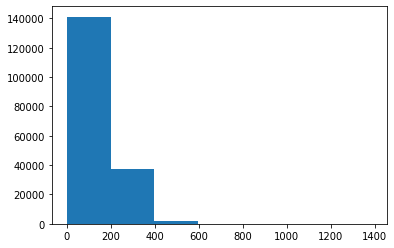

In [ ]:
# Check the distribution of our sequences at character-level
import matplotlib.pyplot as plt
plt.hist(char_lens, bins=7);

In [ ]:
# Find what character length covers 95% of sequences
output_seq_char_len = int(np.percentile(char_lens, 95))
output_seq_char_len

290

In [ ]:
np.max(char_lens)

1386

In [ ]:
# Get all keyboard characters for char-level embedding
import string
alphabet = string.ascii_lowercase + string.digits + string.punctuation
alphabet

'abcdefghijklmnopqrstuvwxyz0123456789!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [ ]:
# Create char-level token vectorizer instance
NUM_CHAR_TOKENS = len(alphabet) + 2 # num characters in alphabet + space + OOV token
char_vectorizer = TextVectorization(max_tokens= NUM_CHAR_TOKENS,
                                    output_sequence_length=output_seq_char_len,
                                    standardize="lower_and_strip_punctuation",
                                    name="char_vectorizer")

# Adapt character vectorizer to training characters
char_vectorizer.adapt(train_chars)

In [ ]:
# Check character vocabulary characteristics
char_vocab = char_vectorizer.get_vocabulary()
print(f"Number of different characters in character vocab: {len(char_vocab)}")
print(f"5 most common characters: {char_vocab[:5]}")
print(f"5 least common characters: {char_vocab[-5:]}")

Number of different characters in character vocab: 28
5 most common characters: ['', '[UNK]', 'e', 't', 'i']
5 least common characters: ['k', 'x', 'z', 'q', 'j']


In [ ]:
# Test out character vectorizer
random_train_chars = random.choice(train_chars)
print(f"Charified text:\n{random_train_chars}")
print(f"\nLength of chars: {len(random_train_chars.split())}")
vectorized_chars = char_vectorizer([random_train_chars])
print(f"\nVectorized chars:\n{vectorized_chars}")
print(f"\nLength of vectorized chars: {len(vectorized_chars[0])}")

Charified text:
g o n a d o t r o p i n - r e l e a s i n g   h o r m o n e   a g o n i s t s   a r e   a s s o c i a t e d   w i t h   d e l e t e r i o u s   e f f e c t s   o n   b o n e   .

Length of chars: 79

Vectorized chars:
[[18  7  6  5 10  7  3  8  7 14  4  6  8  2 12  2  5  9  4  6 18 13  7  8
  15  7  6  2  5 18  7  6  4  9  3  9  5  8  2  5  9  9  7 11  4  5  3  2
  10 20  4  3 13 10  2 12  2  3  2  8  4  7 16  9  2 17 17  2 11  3  9  7
   6 22  7  6  2  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0  0  0  0  0  0  0  0 

In [ ]:
# Create char embedding layer
char_embed = layers.Embedding(input_dim=NUM_CHAR_TOKENS, # number of different characters
                              output_dim=25, # embedding dimension of each character (same as Figure 1 in https://arxiv.org/pdf/1612.05251.pdf)
                              mask_zero=False, # don't use masks (this messes up model_5 if set to True)
                              name="char_embed")

# Test out character embedding layer
print(f"Charified text (before vectorization and embedding):\n{random_train_chars}\n")
char_embed_example = char_embed(char_vectorizer([random_train_chars]))
print(f"Embedded chars (after vectorization and embedding):\n{char_embed_example}\n")
print(f"Character embedding shape: {char_embed_example.shape}")

Charified text (before vectorization and embedding):
g o n a d o t r o p i n - r e l e a s i n g   h o r m o n e   a g o n i s t s   a r e   a s s o c i a t e d   w i t h   d e l e t e r i o u s   e f f e c t s   o n   b o n e   .

Embedded chars (after vectorization and embedding):
[[[ 0.03747274  0.02730237  0.03120159 ...  0.00250088 -0.01589885
   -0.02351376]
  [-0.01469793  0.00956164 -0.04268188 ... -0.04573464  0.04512013
   -0.04640645]
  [-0.04266112 -0.03847113 -0.03721722 ... -0.04417762 -0.0411604
    0.03606936]
  ...
  [ 0.01042868 -0.04797146 -0.040608   ... -0.02134969 -0.00411661
    0.04678794]
  [ 0.01042868 -0.04797146 -0.040608   ... -0.02134969 -0.00411661
    0.04678794]
  [ 0.01042868 -0.04797146 -0.040608   ... -0.02134969 -0.00411661
    0.04678794]]]

Character embedding shape: (1, 290, 25)


In [ ]:
# Make Conv1D on chars only
inputs = layers.Input(shape=(1,), dtype=tf.string)
char_vectors = char_vectorizer(inputs)
char_embeddings = char_embed(char_vectors)
x = layers.Conv1D(64, kernel_size=5, padding="same", activation="relu")(char_embeddings)
x = layers.GlobalMaxPool1D()(x)
outputs = layers.Dense(num_classes, activation="softmax")(x)
model_3 = tf.keras.Model(inputs=inputs,
                         outputs=outputs,
                         name="model_3_conv1D_char_embedding")

# Compile model
model_3.compile(loss="categorical_crossentropy",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

In [ ]:
# Check the summary of conv1d_char_model
model_3.summary()

Model: "model_3_conv1D_char_embedding"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, 1)]               0         
                                                                 
 char_vectorizer (TextVector  (None, 290)              0         
 ization)                                                        
                                                                 
 char_embed (Embedding)      (None, 290, 25)           1750      
                                                                 
 conv1d_1 (Conv1D)           (None, 290, 64)           8064      
                                                                 
 global_max_pooling1d (Globa  (None, 64)               0         
 lMaxPooling1D)                                                  
                                                                 
 dense_3 (Dense)             (None, 5

In [ ]:
# Create char datasets
train_char_dataset = tf.data.Dataset.from_tensor_slices((train_chars, train_labels_one_hot)).batch(32).prefetch(tf.data.AUTOTUNE)
val_char_dataset = tf.data.Dataset.from_tensor_slices((val_chars, val_labels_one_hot)).batch(32).prefetch(tf.data.AUTOTUNE)

train_char_dataset

<PrefetchDataset element_spec=(TensorSpec(shape=(None,), dtype=tf.string, name=None), TensorSpec(shape=(None, 5), dtype=tf.float64, name=None))>

In [ ]:
# Fit the model on chars only
model_3_history = model_3.fit(train_char_dataset,
                              steps_per_epoch=int(0.1 * len(train_char_dataset)),
                              epochs=3,
                              validation_data=val_char_dataset,
                              validation_steps=int(0.1 * len(val_char_dataset)))

Epoch 1/3
562/562 [==============================] - 14s 24ms/step - loss: 1.2572 - accuracy: 0.4939 - val_loss: 1.0521 - val_accuracy: 0.5814
Epoch 2/3
562/562 [==============================] - 13s 24ms/step - loss: 1.0121 - accuracy: 0.5958 - val_loss: 0.9509 - val_accuracy: 0.6280
Epoch 3/3
562/562 [==============================] - 13s 24ms/step - loss: 0.9340 - accuracy: 0.6365 - val_loss: 0.8788 - val_accuracy: 0.6622


In [ ]:
# Evaluate model_3 on whole validation char dataset
model_3.evaluate(val_char_dataset)

945/945 [==============================] - 9s 9ms/step - loss: 0.8945 - accuracy: 0.6516


[0.8945297598838806, 0.651595413684845]

In [ ]:
# Make predictions with character model only
model_3_pred_probs = model_3.predict(val_char_dataset)
model_3_pred_probs

array([[0.1424574 , 0.51695484, 0.05624759, 0.23166054, 0.05267958],
       [0.2509044 , 0.40902707, 0.01965286, 0.11053264, 0.20988302],
       [0.14684875, 0.30564097, 0.18963465, 0.2822409 , 0.07563476],
       ...,
       [0.02720325, 0.06149814, 0.19097286, 0.04684929, 0.6734764 ],
       [0.01981777, 0.07800733, 0.35982975, 0.02121586, 0.52112925],
       [0.596119  , 0.24322763, 0.08398319, 0.05115487, 0.02551533]],
      dtype=float32)

In [ ]:
# Convert predictions to classes
model_3_preds = tf.argmax(model_3_pred_probs, axis=1)
model_3_preds

<tf.Tensor: shape=(30212,), dtype=int64, numpy=array([1, 1, 1, ..., 4, 4, 0])>

In [ ]:
# Calculate Conv1D char only model results
model_3_results = calculate_results(y_true=val_labels_encoded,
                                        y_pred=model_3_preds)
model_3_results

{'accuracy': 65.1595392559248,
 'f1': 0.6422954020931765,
 'precision': 0.6428448824935399,
 'recall': 0.651595392559248}

Model 4: Combining pretrained token embeddings + character embeddings (hybrid embedding layer)

[Refrence paper: Neural Networks for Joint Sentence Classification in Medical Paper Abstracts](https://arxiv.org/pdf/1612.05251.pdf)


In [ ]:
# 1. Setup token inputs/model
token_inputs = layers.Input(shape=[], dtype=tf.string, name="token_input")
token_embeddings = tf_hub_embedding_layer(token_inputs)
token_output = layers.Dense(128, activation="relu")(token_embeddings)
token_model = tf.keras.Model(inputs=token_inputs,
                             outputs=token_output)

# 2. Setup char inputs/model
char_inputs = layers.Input(shape=(1,), dtype=tf.string, name="char_input")
char_vectors = char_vectorizer(char_inputs)
char_embeddings = char_embed(char_vectors)
char_bi_lstm = layers.Bidirectional(layers.LSTM(25))(char_embeddings) # bi-LSTM shown in Figure 1 of https://arxiv.org/pdf/1612.05251.pdf
char_model = tf.keras.Model(inputs=char_inputs,
                            outputs=char_bi_lstm)

# 3. Concatenate token and char inputs (create hybrid token embedding)
token_char_concat = layers.Concatenate(name="token_char_hybrid")([token_model.output, 
                                                                  char_model.output])

# 4. Create output layers - addition of dropout discussed in 4.2 of https://arxiv.org/pdf/1612.05251.pdf
combined_dropout = layers.Dropout(0.5)(token_char_concat)
combined_dense = layers.Dense(200, activation="relu")(combined_dropout) # slightly different to Figure 1 due to different shapes of token/char embedding layers
final_dropout = layers.Dropout(0.5)(combined_dense)
output_layer = layers.Dense(num_classes, activation="softmax")(final_dropout)

# 5. Construct model with char and token inputs
model_4 = tf.keras.Model(inputs=[token_model.input, char_model.input],
                         outputs=output_layer,
                         name="model_4_token_and_char_embeddings")

In [ ]:
# Get summary of token and character model
model_4.summary()

Model: "model_4_token_and_char_embeddings"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 char_input (InputLayer)        [(None, 1)]          0           []                               
                                                                                                  
 token_input (InputLayer)       [(None,)]            0           []                               
                                                                                                  
 char_vectorizer (TextVectoriza  (None, 290)         0           ['char_input[0][0]']             
 tion)                                                                                            
                                                                                                  
 universal_sentence_encoder (Ke  (None, 512)         256797824   [

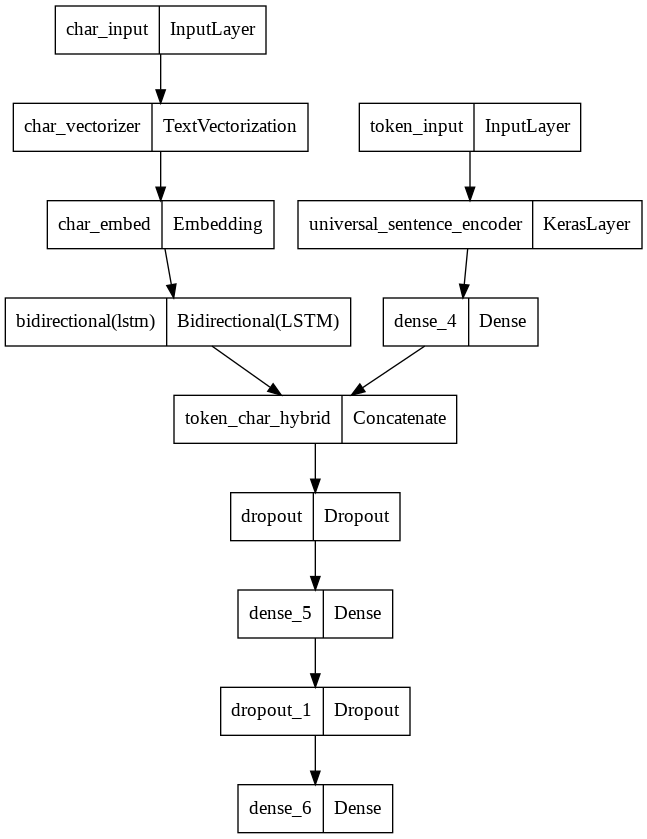

In [ ]:
# Plot hybrid token and character model
from tensorflow.keras.utils import plot_model
plot_model(model_4)

Combining token and character data into a tf.data dataset

In [ ]:
# Combine chars and tokens into a dataset
train_char_token_data = tf.data.Dataset.from_tensor_slices((train_sentences, train_chars)) # make data
train_char_token_labels = tf.data.Dataset.from_tensor_slices(train_labels_one_hot) # make labels
train_char_token_dataset = tf.data.Dataset.zip((train_char_token_data, train_char_token_labels)) # combine data and labels

# Prefetch and batch train data
train_char_token_dataset = train_char_token_dataset.batch(32).prefetch(tf.data.AUTOTUNE) 

# Repeat same steps validation data
val_char_token_data = tf.data.Dataset.from_tensor_slices((val_sentences, val_chars))
val_char_token_labels = tf.data.Dataset.from_tensor_slices(val_labels_one_hot)
val_char_token_dataset = tf.data.Dataset.zip((val_char_token_data, val_char_token_labels))

# Prefetch and batch validation data
val_char_token_dataset = val_char_token_dataset.batch(32).prefetch(tf.data.AUTOTUNE)

In [ ]:
# Check out training char and token embedding dataset
train_char_token_dataset, val_char_token_dataset

(<PrefetchDataset element_spec=((TensorSpec(shape=(None,), dtype=tf.string, name=None), TensorSpec(shape=(None,), dtype=tf.string, name=None)), TensorSpec(shape=(None, 5), dtype=tf.float64, name=None))>,
 <PrefetchDataset element_spec=((TensorSpec(shape=(None,), dtype=tf.string, name=None), TensorSpec(shape=(None,), dtype=tf.string, name=None)), TensorSpec(shape=(None, 5), dtype=tf.float64, name=None))>)

In [ ]:
# Compile token char model
model_4.compile(loss="categorical_crossentropy",
                optimizer=tf.keras.optimizers.Adam(), # section 4.2 of https://arxiv.org/pdf/1612.05251.pdf mentions using SGD but we'll stick with Adam
                metrics=["accuracy"])

In [ ]:
# Fit the model on tokens and chars
model_4_history = model_4.fit(train_char_token_dataset, # train on dataset of token and characters
                              steps_per_epoch=len(train_char_token_dataset),
                              epochs=3,
                              validation_data=val_char_token_dataset,
                              validation_steps=int(0.15 * len(val_char_token_dataset)))

Epoch 1/3
5627/5627 [==============================] - 1234s 218ms/step - loss: 0.7549 - accuracy: 0.7112 - val_loss: 0.6154 - val_accuracy: 0.7715
Epoch 2/3
5627/5627 [==============================] - 1278s 227ms/step - loss: 0.6734 - accuracy: 0.7458 - val_loss: 0.5823 - val_accuracy: 0.7770
Epoch 3/3
5627/5627 [==============================] - 1282s 228ms/step - loss: 0.6494 - accuracy: 0.7548 - val_loss: 0.5774 - val_accuracy: 0.7793


In [ ]:
# Evaluate on the whole validation dataset
model_4.evaluate(val_char_token_dataset)

945/945 [==============================] - 56s 59ms/step - loss: 0.5882 - accuracy: 0.7755


[0.5881823897361755, 0.7755196690559387]

In [ ]:
# Make predictions using the token-character model hybrid
model_4_pred_probs = model_4.predict(val_char_token_dataset)
model_4_pred_probs

array([[5.1863438e-01, 2.9868785e-01, 1.1195560e-03, 1.7742305e-01,
        4.1351542e-03],
       [3.3243182e-01, 5.7644874e-01, 3.2004747e-03, 8.6214863e-02,
        1.7041246e-03],
       [5.3353828e-01, 3.9161863e-03, 2.5204379e-02, 4.3592456e-01,
        1.4166333e-03],
       ...,
       [5.6675275e-05, 5.7161989e-04, 4.2787045e-03, 1.0540955e-05,
        9.9508250e-01],
       [1.8392067e-02, 9.1662794e-02, 1.2736760e-01, 5.7602972e-03,
        7.5681728e-01],
       [1.1041719e-02, 9.8537308e-01, 1.2645221e-03, 5.5899820e-04,
        1.7616544e-03]], dtype=float32)

In [ ]:
# Turn prediction probabilities into prediction classes
model_4_preds = tf.argmax(model_4_pred_probs, axis=1)
model_4_preds

<tf.Tensor: shape=(30212,), dtype=int64, numpy=array([0, 1, 0, ..., 4, 4, 1])>

In [ ]:
# Get results of token-char-hybrid model
model_4_results = calculate_results(y_true=val_labels_encoded,
                                    y_pred=model_4_preds)
model_4_results

{'accuracy': 77.55196610618297,
 'f1': 0.7711240427965901,
 'precision': 0.7768826730802703,
 'recall': 0.7755196610618298}

Model 5: Transfer Learning with pretrained token embeddings + character embeddings + positional embeddings

In [ ]:
# Inspect training dataframe
train_df.head()

,target,text,line_number,total_lines
0,OBJECTIVE,to investigate the efficacy of @ weeks of dail...,0,11
1,METHODS,a total of @ patients with primary knee oa wer...,1,11
2,METHODS,outcome measures included pain reduction and i...,2,11
3,METHODS,pain was assessed using the visual analog pain...,3,11
4,METHODS,secondary outcome measures included the wester...,4,11


In [ ]:
# How many different line numbers are there?
train_df["line_number"].value_counts()

0     15000
1     15000
2     15000
3     15000
4     14992
5     14949
6     14758
7     14279
8     13346
9     11981
10    10041
11     7892
12     5853
13     4152
14     2835
15     1861
16     1188
17      751
18      462
19      286
20      162
21      101
22       66
23       33
24       22
25       14
26        7
27        4
28        3
29        1
30        1
Name: line_number, dtype: int64

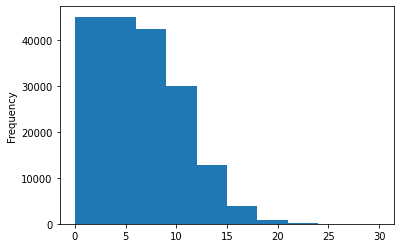

In [ ]:
# Check the distribution of "line_number" column
train_df.line_number.plot.hist()

In [ ]:
# Use TensorFlow to create one-hot-encoded tensors of our "line_number" column 
train_line_numbers_one_hot = tf.one_hot(train_df["line_number"].to_numpy(), depth=15)
val_line_numbers_one_hot = tf.one_hot(val_df["line_number"].to_numpy(), depth=15)
test_line_numbers_one_hot = tf.one_hot(test_df["line_number"].to_numpy(), depth=15)

In [ ]:
# Check one-hot encoded "line_number" feature samples
train_line_numbers_one_hot.shape, train_line_numbers_one_hot[:20]

(TensorShape([180040, 15]), <tf.Tensor: shape=(20, 15), dtype=float32, numpy=
 array([[1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0.],
        [1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0.,

In [ ]:
# How many different numbers of lines are there?
train_df["total_lines"].value_counts()

11    24468
10    23639
12    22113
9     19400
13    18438
14    14610
8     12285
15    10768
7      7464
16     7429
17     5202
6      3353
18     3344
19     2480
20     1281
5      1146
21      770
22      759
23      264
4       215
24      200
25      182
26       81
28       58
3        32
30       31
27       28
Name: total_lines, dtype: int64

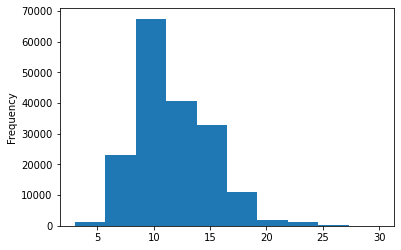

In [ ]:
# Check the distribution of total lines
train_df.total_lines.plot.hist();

In [ ]:
# Check the coverage of a "total_lines" value of 20
np.percentile(train_df.total_lines, 98) # a value of 20 covers 98% of samples

20.0

In [ ]:
# Use TensorFlow to create one-hot-encoded tensors of our "total_lines" column 
train_total_lines_one_hot = tf.one_hot(train_df["total_lines"].to_numpy(), depth=20)
val_total_lines_one_hot = tf.one_hot(val_df["total_lines"].to_numpy(), depth=20)
test_total_lines_one_hot = tf.one_hot(test_df["total_lines"].to_numpy(), depth=20)

# Check shape and samples of total lines one-hot tensor
train_total_lines_one_hot.shape, train_total_lines_one_hot[:10]

(TensorShape([180040, 20]), <tf.Tensor: shape=(10, 20), dtype=float32, numpy=
 array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0.,
         0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0.,
         0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0.,
         0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0.,
         0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0.,
         0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0.,
         0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0.,
         0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0.,
         0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0.,
         0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0.

Building a tribrid embedding model

* Create a token-level model (similar to model_1)
* Create a character-level model (similar to model_3 with a slight modification to reflect the paper)
* Create a "line_number" model (takes in one-hot-encoded "line_number" tensor and passes it through a non-linear layer)
* Create a "total_lines" model (takes in one-hot-encoded "total_lines" tensor and passes it through a non-linear layer)
* Combine (using layers.Concatenate) the outputs of 1 and 2 into a token-character-hybrid embedding and pass it series of output to Figure 1 and section 4.2 of Neural Networks for Joint Sentence Classification in Medical Paper Abstracts
* Combine (using layers.Concatenate) the outputs of 3, 4 and 5 into a token-character-positional tribrid embedding
* Create an output layer to accept the tribrid embedding and output predicted label probabilities
* Combine the inputs of 1, 2, 3, 4 and outputs of 7 into a tf.keras.Model

In [ ]:
#1. Setup token inputs/model
token_inputs = layers.Input(shape=[], dtype=tf.string, name="token_input")
token_embeddings = tf_hub_embedding_layer(token_inputs)
token_output = layers.Dense(128, activation="relu")(token_embeddings)
token_model = tf.keras.Model(inputs=token_inputs,
                             outputs=token_output)

#2. Setup char inputs/model
char_inputs= layers.Input(shape=(1,), dtype=tf.string, name='')
char_vectors= char_vectorizer(char_inputs)
char_embeddings = char_embed(char_vectors)
char_bi_lstm = layers.Bidirectional(layers.LSTM(32))(char_embeddings) # bi-LSTM shown in Figure 1 of https://arxiv.org/pdf/1612.05251.pdf
char_model = tf.keras.Model(inputs=char_inputs,
                            outputs=char_bi_lstm)

# 3. Line numbers inputs
line_number_inputs = layers.Input(shape=(15,), dtype=tf.int32, name="line_number_input")
x = layers.Dense(32, activation="relu")(line_number_inputs)
line_number_model = tf.keras.Model(inputs=line_number_inputs,
                                   outputs=x)

# 4. Total lines inputs
total_lines_inputs = layers.Input(shape=(20,), dtype=tf.int32, name="total_lines_input")
y = layers.Dense(32, activation="relu")(total_lines_inputs)
total_line_model = tf.keras.Model(inputs=total_lines_inputs,
                                  outputs=y)

# 5. Combine token and char embeddings into a hybrid embedding
combined_embeddings = layers.Concatenate(name="token_char_hybrid_embedding")([token_model.output,
                                                                              char_model.output])
z = layers.Dense(256, activation='relu')(combined_embeddings)
z = layers.Dropout(0.5)(z)

# 6. Combine positional embeddings with combined token and char embeddings into a tribrid embedding
z = layers.Concatenate(name="token_char_positional_embedding")([line_number_model.output,
                                                                total_line_model.output,
                                                                z])

# 7. Create output layer
output_layer = layers.Dense(5, activation="softmax", name="output_layer")(z)

# 8. Put together model
model_5 = tf.keras.Model([line_number_model.input,
                                 total_line_model.input,
                                 token_model.input, 
                                 char_model.input],
                         outputs=output_layer)


In [ ]:
# Get a summary of our token, char and positional embedding model
model_5.summary()

Model: "model_6"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_4 (InputLayer)           [(None, 1)]          0           []                               
                                                                                                  
 token_input (InputLayer)       [(None,)]            0           []                               
                                                                                                  
 char_vectorizer (TextVectoriza  (None, 290)         0           ['input_4[0][0]']                
 tion)                                                                                            
                                                                                                  
 universal_sentence_encoder (Ke  (None, 512)         256797824   ['token_input[0][0]']      

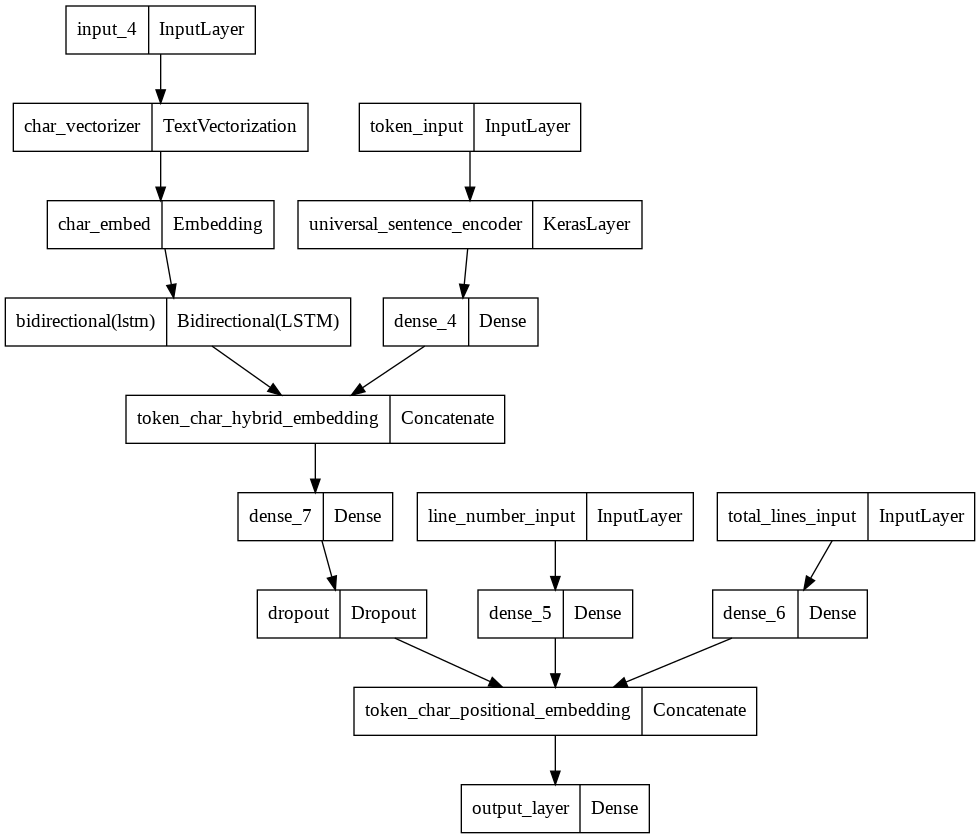

In [ ]:
# Plot the token, char, positional embedding model
from tensorflow.keras.utils import plot_model
plot_model(model_5)

In [ ]:
# Check which layers of our model are trainable or not
for layer in model_5.layers:
  print(layer, layer.trainable)

<keras.engine.input_layer.InputLayer object at 0x7f59897cc510> True
<keras.engine.input_layer.InputLayer object at 0x7f598987e690> True
<keras.layers.preprocessing.text_vectorization.TextVectorization object at 0x7f5980ed7750> True
<tensorflow_hub.keras_layer.KerasLayer object at 0x7f5988d4ab50> False
<keras.layers.embeddings.Embedding object at 0x7f597fdf63d0> True
<keras.layers.core.dense.Dense object at 0x7f5989967f90> True
<keras.layers.wrappers.Bidirectional object at 0x7f59897ac9d0> True
<keras.layers.merge.Concatenate object at 0x7f598983ccd0> True
<keras.engine.input_layer.InputLayer object at 0x7f59896f4a50> True
<keras.engine.input_layer.InputLayer object at 0x7f5989643b90> True
<keras.layers.core.dense.Dense object at 0x7f5989850bd0> True
<keras.layers.core.dense.Dense object at 0x7f5989685890> True
<keras.layers.core.dense.Dense object at 0x7f5989814650> True
<keras.layers.core.dropout.Dropout object at 0x7f59897ffd10> True
<keras.layers.merge.Concatenate object at 0x7f5989

In [ ]:
# Compile token, char, positional embedding model
model_5.compile(loss=tf.keras.losses.CategoricalCrossentropy(label_smoothing=0.2), # add label smoothing (examples which are really confident get smoothed a little)
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

In [ ]:
# Create training and validation datasets (all four kinds of inputs)
train_pos_char_token_data = tf.data.Dataset.from_tensor_slices((train_line_numbers_one_hot,
                                                                    train_total_lines_one_hot,
                                                                    train_sentences,
                                                                    train_chars))
train_pos_char_token_labels=tf.data.Dataset.from_tensor_slices(train_labels_one_hot)
train_pos_char_token_dataset= tf.data.Dataset.zip((train_pos_char_token_data, train_pos_char_token_labels))
train_pos_char_token_dataset= train_pos_char_token_dataset.batch(32).prefetch(tf.data.AUTOTUNE)

# Validation dataset
val_pos_char_token_data = tf.data.Dataset.from_tensor_slices((val_line_numbers_one_hot,
                                                              val_total_lines_one_hot,
                                                              val_sentences,
                                                              val_chars))
val_pos_char_token_labels = tf.data.Dataset.from_tensor_slices(val_labels_one_hot)
val_pos_char_token_dataset = tf.data.Dataset.zip((val_pos_char_token_data, val_pos_char_token_labels))
val_pos_char_token_dataset = val_pos_char_token_dataset.batch(32).prefetch(tf.data.AUTOTUNE) # turn into batches and prefetch appropriately

# Check input shapes
train_pos_char_token_dataset, val_pos_char_token_dataset

(<PrefetchDataset element_spec=((TensorSpec(shape=(None, 15), dtype=tf.float32, name=None), TensorSpec(shape=(None, 20), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.string, name=None), TensorSpec(shape=(None,), dtype=tf.string, name=None)), TensorSpec(shape=(None, 5), dtype=tf.float64, name=None))>,
 <PrefetchDataset element_spec=((TensorSpec(shape=(None, 15), dtype=tf.float32, name=None), TensorSpec(shape=(None, 20), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.string, name=None), TensorSpec(shape=(None,), dtype=tf.string, name=None)), TensorSpec(shape=(None, 5), dtype=tf.float64, name=None))>)

In [ ]:
# Fit the token, char and positional embedding model
history_model_5 = model_5.fit(train_pos_char_token_dataset,
                              steps_per_epoch=len(train_pos_char_token_dataset),
                              epochs=3,
                              validation_data=val_pos_char_token_dataset,
                              validation_steps=int(0.15 * len(val_pos_char_token_dataset)))

Epoch 1/3
5627/5627 [==============================] - 1329s 235ms/step - loss: 0.9537 - accuracy: 0.8227 - val_loss: 0.9035 - val_accuracy: 0.8528
Epoch 2/3
5627/5627 [==============================] - 1281s 228ms/step - loss: 0.9101 - accuracy: 0.8537 - val_loss: 0.8930 - val_accuracy: 0.8613
Epoch 3/3
5627/5627 [==============================] - 1282s 228ms/step - loss: 0.8974 - accuracy: 0.8630 - val_loss: 0.8908 - val_accuracy: 0.8613


In [ ]:
# Make evaluation with token-char-positional hybrid model
model_5_pred_probs= model_5.evaluate(val_pos_char_token_dataset)
model_5_pred_probs

945/945 [==============================] - 52s 56ms/step - loss: 0.8962 - accuracy: 0.8567


[0.8961713314056396, 0.8567456603050232]

In [ ]:
# Make predictions with token-char-positional hybrid model
model_5_pred_probs= model_5.predict(val_pos_char_token_dataset)
model_5_pred_probs

In [ ]:
# Make predictions classes with token-char-positional hybrid model
model_5_preds= tf.argmax(model_5_pred_probs, axis=1)
model_5_preds

<tf.Tensor: shape=(30212,), dtype=int64, numpy=array([0, 0, 3, ..., 4, 4, 1])>

In [ ]:
# Calculate results of token-char-positional hybrid model
model_5_results = calculate_results(y_true=val_labels_encoded,
                                    y_pred=model_5_preds)
model_5_results

Compare model results

In [ ]:
# Combine model results into a DataFrame
all_model_results = pd.DataFrame({"baseline": baseline_results,
                                  "custom_token_embed_conv1d": model_1_results,
                                  "pretrained_token_embed": model_2_results,
                                  "custom_char_embed_conv1d": model_3_results,
                                  "hybrid_char_token_embed": model_4_results,
                                  "tribrid_pos_char_token_embed": model_5_results})
all_model_results = all_model_results.transpose()
all_model_results

,accuracy,precision,recall,f1
baseline,72.183238,0.718647,0.721832,0.698925
custom_token_embed_conv1d,78.561499,0.782473,0.785615,0.783373
pretrained_token_embed,71.478221,0.714987,0.714782,0.711898
custom_char_embed_conv1d,64.964253,0.646233,0.649643,0.640595
hybrid_char_token_embed,77.551966,0.776883,0.775520,0.771124
tribrid_pos_char_token_embed,85.763935,0.859900,0.857639,0.854912


In [ ]:
# Reduce the accuracy to same scale as other metrics
all_model_results["accuracy"] = all_model_results["accuracy"]/100

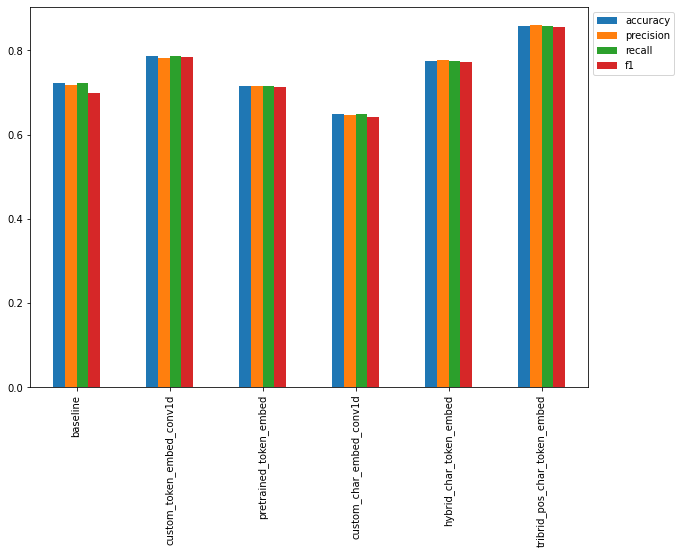

In [ ]:
# Plot and compare all of the model results
all_model_results.plot(kind="bar", figsize=(10, 7)).legend(bbox_to_anchor=(1.0, 1.0));

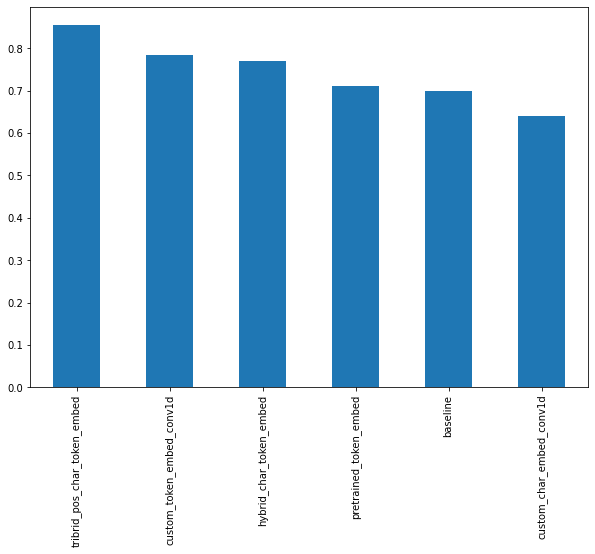

In [ ]:
# Sort model results by f1-score
all_model_results.sort_values("f1", ascending=False)["f1"].plot(kind="bar", figsize=(10, 7));

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
#save the model to google drive
model_5.save('/content/drive/MyDrive/tensorflow_course/skimlit/Without_GPU')

INFO:tensorflow:Assets written to: /content/drive/MyDrive/tensorflow_course/skimlit/Without_GPU/assets


INFO:tensorflow:Assets written to: /content/drive/MyDrive/tensorflow_course/skimlit/Without_GPU/assets


In [ ]:
#save the model to google drive
# model_5.save('/content/abstractor.h5')
# model_5.save('abstractor_model', save_format='h5')

In [ ]:
# Example of copying saved model from Google Colab to Drive (requires Google Drive to be mounted)
!cp /content/drive/MyDrive/tensorflow_course/skimlit/Without_GPU -r  skim_lit_best_model

In [ ]:
# Import TensorFlow model dependencies (if needed) - https://github.com/tensorflow/tensorflow/issues/38250 
import tensorflow_hub as hub
import tensorflow as tf
from tensorflow.keras.layers import TextVectorization

model_path = "/content/skim_lit_best_model"

# Load downloaded model from Google Storage
loaded_model = tf.keras.models.load_model(model_path)

In [ ]:
# Make predictions with the loaded model on the validation set
loaded_pred_probs = loaded_model.predict(val_pos_char_token_dataset, verbose=1)
loaded_preds = tf.argmax(loaded_pred_probs, axis=1)
loaded_preds[:10]

945/945 [==============================] - 48s 50ms/step


<tf.Tensor: shape=(10,), dtype=int64, numpy=array([0, 0, 3, 2, 2, 4, 4, 4, 4, 1])>

In [ ]:
# Evaluate loaded model's predictions
loaded_model_results = calculate_results(val_labels_encoded,
                                         loaded_preds)
loaded_model_results

{'accuracy': 85.67456639745797,
 'f1': 0.8537356921260094,
 'precision': 0.8582942377479794,
 'recall': 0.8567456639745796}

In [ ]:
# Compare loaded model results with original trained model results (should be quite close)
np.isclose(list(model_5_results.values()), list(loaded_model_results.values()), rtol=1e-02)

array([ True,  True,  True,  True])

In [ ]:
loaded_model.summary()

Model: "model_6"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_4 (InputLayer)           [(None, 1)]          0           []                               
                                                                                                  
 token_input (InputLayer)       [(None,)]            0           []                               
                                                                                                  
 char_vectorizer (TextVectoriza  (None, 290)         0           ['input_4[0][0]']                
 tion)                                                                                            
                                                                                                  
 universal_sentence_encoder (Ke  (None, 512)         256797824   ['token_input[0][0]']      

Evaluate on Test Data

In [ ]:
# Create test dataset batch and prefetched
test_pos_char_token_data = tf.data.Dataset.from_tensor_slices((test_line_numbers_one_hot,
                                                               test_total_lines_one_hot,
                                                               test_sentences,
                                                               test_chars))
test_pos_char_token_labels = tf.data.Dataset.from_tensor_slices(test_labels_one_hot)
test_pos_char_token_dataset = tf.data.Dataset.zip((test_pos_char_token_data, test_pos_char_token_labels))
test_pos_char_token_dataset = test_pos_char_token_dataset.batch(32).prefetch(tf.data.AUTOTUNE)

# Check shapes
test_pos_char_token_dataset

<PrefetchDataset element_spec=((TensorSpec(shape=(None, 15), dtype=tf.float32, name=None), TensorSpec(shape=(None, 20), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.string, name=None), TensorSpec(shape=(None,), dtype=tf.string, name=None)), TensorSpec(shape=(None, 5), dtype=tf.float64, name=None))>

In [ ]:
# Make predictions on the test dataset
test_pred_probs = loaded_model.predict(test_pos_char_token_dataset,
                                       verbose=1)
test_preds = tf.argmax(test_pred_probs, axis=1)
test_preds[:10]

942/942 [==============================] - 25s 27ms/step


<tf.Tensor: shape=(10,), dtype=int64, numpy=array([3, 0, 2, 2, 4, 4, 4, 1, 4, 0])>

In [ ]:
# Evaluate loaded model test predictions
loaded_model_test_results = calculate_results(y_true=test_labels_encoded,
                                              y_pred=test_preds)
loaded_model_test_results

{'accuracy': 82.76754604280737,
 'f1': 0.8266409190729027,
 'precision': 0.8263946477859389,
 'recall': 0.8276754604280737}

# Predict with Realtime data

In [ ]:
!pip install -q wordcloud
import wordcloud
import nltk

nltk.download('punkt')

import nltk.data
import tensorflow as tf

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


In [ ]:
def preprocess_text(filename):
  """Returns a list of dictionaries of abstract line data.

  Takes in filename, reads its contents and sorts through each line,
  extracting things like the target label, the text of the sentence,
  how many sentences are in the current abstract and what sentence number
  the target line is.

  Args:
      filename: a string of the target text file to read and extract line data
      from.

  Returns:
      A list of sentences each containing a line from an abstract
  """
  # Make function to split sentences into characters
  def split_chars(text):
    return " ".join(list(text))

  tokenizer = nltk.data.load('tokenizers/punkt/english.pickle')
  fp = open(filename)
  data = fp.read()
  input_lines= tokenizer.tokenize(data)# get all lines from filename
  sentence= [line for line in input_lines]
  line_number =[sentence.index(line) for line in input_lines]
  chars=[split_chars(line) for line in input_lines]
  return input_lines, line_number, [(len(input_lines)-1)]*(len(input_lines)), sentence, chars

In [ ]:
input_lines, line_number, total_lines, sentence, chars=preprocess_text('test.txt')


In [ ]:
line_number, total_lines

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], [9, 9, 9, 9, 9, 9, 9, 9, 9, 9])

In [ ]:
input_lines

['Many pathogenic processes and diseases are the result of an erroneous activation of the complement cascade and a number of inhibitors of complement have thus been examined for anti-inflammatory actions.',
 'It was recently demonstrated that supraphysiological concentrations of the endogenous complement inhibitor MAp@ ( also denoted MAP@ ) protect against myocardial reperfusion injury.',
 'In the present study , we examined the association between outcome after acute myocardial infarction ( MI ) and the plasma levels of MAp@ and its related proteins MASP-@ and MASP-@ in patients with first-time MI.',
 'In addition , we compared plasma levels of MAp@ , MASP-@ , and MASP-@ in MI patients to levels in a healthy control group.',
 'A total of @ MI patients and @ control persons were included.',
 'Plasma samples were obtained and analysed with time-resolved immunofluorometric assays determining the plasma levels of MAp@ , MASP-@ , and MASP-@.',
 'The myocardial outcomes ( salvage index and 

In [ ]:
chars

['M a n y   p a t h o g e n i c   p r o c e s s e s   a n d   d i s e a s e s   a r e   t h e   r e s u l t   o f   a n   e r r o n e o u s   a c t i v a t i o n   o f   t h e   c o m p l e m e n t   c a s c a d e   a n d   a   n u m b e r   o f   i n h i b i t o r s   o f   c o m p l e m e n t   h a v e   t h u s   b e e n   e x a m i n e d   f o r   a n t i - i n f l a m m a t o r y   a c t i o n s .',
 'I t   w a s   r e c e n t l y   d e m o n s t r a t e d   t h a t   s u p r a p h y s i o l o g i c a l   c o n c e n t r a t i o n s   o f   t h e   e n d o g e n o u s   c o m p l e m e n t   i n h i b i t o r   M A p @   (   a l s o   d e n o t e d   M A P @   )   p r o t e c t   a g a i n s t   m y o c a r d i a l   r e p e r f u s i o n   i n j u r y .',
 'I n   t h e   p r e s e n t   s t u d y   ,   w e   e x a m i n e d   t h e   a s s o c i a t i o n   b e t w e e n   o u t c o m e   a f t e r   a c u t e   m y o c a r d i a l   i n f a r c t i o n   (   M I   )   a n d   t 

In [ ]:
import numpy as np
# How long is each sentence on average?
sent_lens = [len(senten.split()) for senten in sentence]
avg_sent_len = np.mean(sent_lens)
avg_sent_len # return average sentence length (in tokens)

28.7

In [ ]:
# What's the average character length?
char_lens = [len(sent) for sent in sentence]
mean_char_len = np.mean(char_lens)
mean_char_len

164.3

In [ ]:
line_number_onehot= tf.one_hot(line_number, depth=15)
total_lines_onehot= tf.one_hot(total_lines, depth=20)

In [ ]:
line_number_onehot.shape, total_lines_onehot.shape, len(sentence), len(chars)

(TensorShape([10, 15]), TensorShape([10, 20]), 10, 10)

In [ ]:
# Example of copying saved model from Google Colab to Drive (requires Google Drive to be mounted)
!cp /content/drive/MyDrive/tensorflow_course/skimlit/Without_GPU -r  skim_lit_best_model

In [ ]:
# Import TensorFlow model dependencies (if needed) - https://github.com/tensorflow/tensorflow/issues/38250 
import tensorflow_hub as hub
import tensorflow as tf
from tensorflow.keras.layers import TextVectorization

model_path = "/content/skim_lit_best_model"

# Load downloaded model from Google Storage
loaded_model = tf.keras.models.load_model(model_path)

In [ ]:
for layer in loaded_model.layers:
  print(layer.name, layer.trainable, layer.dtype, layer.dtype_policy)

input_4 True string <Policy "string">
token_input True string <Policy "string">
char_vectorizer True string <Policy "string">
universal_sentence_encoder False float32 <Policy "float32">
char_embed True float32 <Policy "float32">
dense_4 True float32 <Policy "float32">
bidirectional True float32 <Policy "float32">
token_char_hybrid_embedding True float32 <Policy "float32">
line_number_input True int32 <Policy "int32">
total_lines_input True int32 <Policy "int32">
dense_7 True float32 <Policy "float32">
dense_5 True float32 <Policy "float32">
dense_6 True float32 <Policy "float32">
dropout True float32 <Policy "float32">
token_char_positional_embedding True float32 <Policy "float32">
output_layer True float32 <Policy "float32">


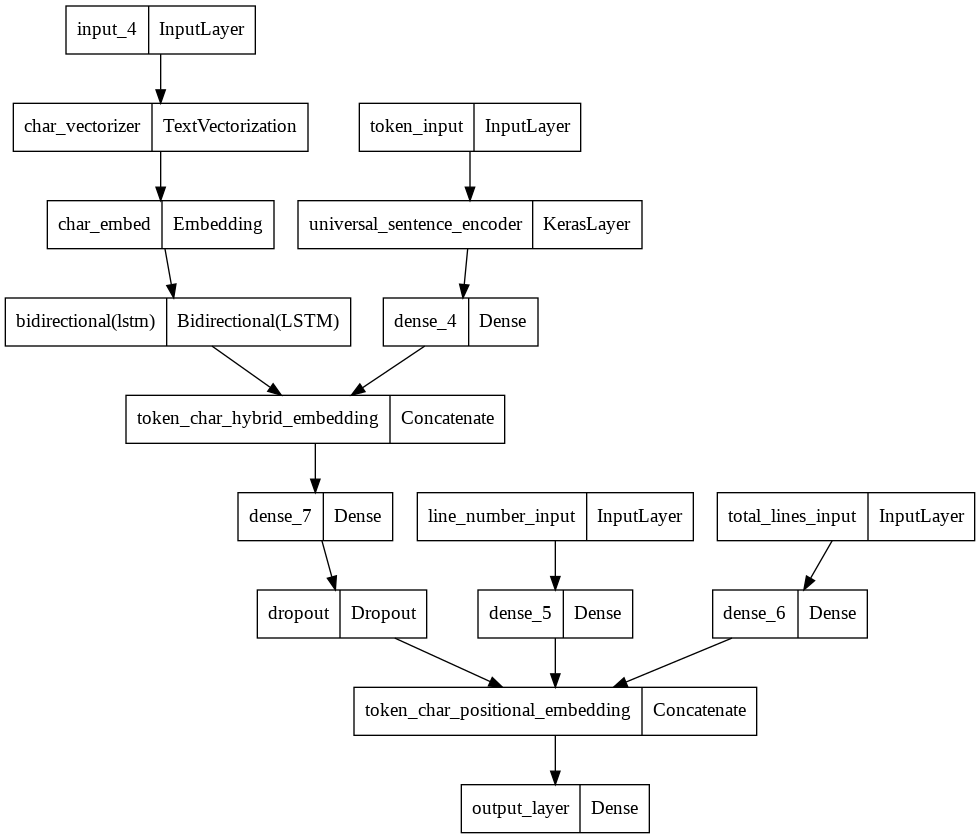

In [ ]:
# Plot the token, char, positional embedding model
from tensorflow.keras.utils import plot_model
plot_model(loaded_model)

In [ ]:
input_data= (line_number_onehot,
             total_lines_onehot,
             tf.constant(input_lines),
             tf.constant(chars))
tested_pred_probs = loaded_model.predict(input_data)
tested_pred_probs

array([[0.57110995, 0.06387806, 0.02895609, 0.27302453, 0.06303137],
       [0.42260233, 0.08191925, 0.17824134, 0.22143868, 0.0957984 ],
       [0.21486509, 0.09339961, 0.34176356, 0.20597097, 0.14400089],
       [0.07443555, 0.04607845, 0.6644122 , 0.07228731, 0.14278655],
       [0.02360963, 0.02584093, 0.11908643, 0.03620726, 0.79525584],
       [0.01909725, 0.05273047, 0.8406589 , 0.03817851, 0.04933486],
       [0.03473889, 0.06326248, 0.18570581, 0.04753983, 0.66875297],
       [0.02153309, 0.04687576, 0.01691144, 0.0296403 , 0.8850394 ],
       [0.01726574, 0.11099202, 0.03311605, 0.02827569, 0.8103505 ],
       [0.02773766, 0.7162698 , 0.02019428, 0.02434034, 0.21145797]],
      dtype=float32)

In [ ]:
# Turn prediction probabilities into prediction classes
test_abstract_preds = tf.argmax(tested_pred_probs, axis=1)
test_abstract_preds

<tf.Tensor: shape=(10,), dtype=int64, numpy=array([0, 0, 2, 2, 4, 2, 4, 4, 4, 1])>

In [ ]:
class_names=['BACKGROUND', 'CONCLUSIONS', 'METHODS', 'OBJECTIVE', 'RESULTS']
for i in range(0, len(test_abstract_preds)):
  if i == 0:
    print('Title: ', class_names[test_abstract_preds[i].numpy()])
    print(sentence[i])
  elif (test_abstract_preds[i-1]==test_abstract_preds[i]):
    print(sentence[i])
  else:
    print('Title: ', class_names[test_abstract_preds[i].numpy()])
    print(sentence[i])

Title:  BACKGROUND
Many pathogenic processes and diseases are the result of an erroneous activation of the complement cascade and a number of inhibitors of complement have thus been examined for anti-inflammatory actions.
It was recently demonstrated that supraphysiological concentrations of the endogenous complement inhibitor MAp@ ( also denoted MAP@ ) protect against myocardial reperfusion injury.
Title:  METHODS
In the present study , we examined the association between outcome after acute myocardial infarction ( MI ) and the plasma levels of MAp@ and its related proteins MASP-@ and MASP-@ in patients with first-time MI.
In addition , we compared plasma levels of MAp@ , MASP-@ , and MASP-@ in MI patients to levels in a healthy control group.
Title:  RESULTS
A total of @ MI patients and @ control persons were included.
Title:  METHODS
Plasma samples were obtained and analysed with time-resolved immunofluorometric assays determining the plasma levels of MAp@ , MASP-@ , and MASP-@.
Tit

In [ ]:
class_names=['BACKGROUND', 'CONCLUSIONS', 'METHODS', 'OBJECTIVE', 'RESULTS']
ordered_class_names= ['BACKGROUND', 'OBJECTIVE', 'METHODS', 'RESULTS', 'CONCLUSIONS']
for i in ordered_class_names:
  for j in class_names:
    if class_names.index(i) == ordered_class_names.index(j):
      print('\033[1m'+i+'\033[0m')
      for k in range(0, len(test_abstract_preds)):
        if (test_abstract_preds[k] == class_names.index(i)):
          print(sentence[k])
        elif (class_names.index(i) not in test_abstract_preds):
          print('\t')
    else:
      continue;

BACKGROUND
Many pathogenic processes and diseases are the result of an erroneous activation of the complement cascade and a number of inhibitors of complement have thus been examined for anti-inflammatory actions.
It was recently demonstrated that supraphysiological concentrations of the endogenous complement inhibitor MAp@ ( also denoted MAP@ ) protect against myocardial reperfusion injury.
OBJECTIVE
	
	
	
	
	
	
	
	
	
	
METHODS
In the present study , we examined the association between outcome after acute myocardial infarction ( MI ) and the plasma levels of MAp@ and its related proteins MASP-@ and MASP-@ in patients with first-time MI.
In addition , we compared plasma levels of MAp@ , MASP-@ , and MASP-@ in MI patients to levels in a healthy control group.
Plasma samples were obtained and analysed with time-resolved immunofluorometric assays determining the plasma levels of MAp@ , MASP-@ , and MASP-@.
RESULTS
A total of @ MI patients and @ control persons were included.
The myocardia

In [ ]:
input_data

(<tf.Tensor: shape=(10, 15), dtype=float32, numpy=
 array([[1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0.]],
       dtype=float32)>, <tf.Tensor: shape=(10, 20), dtype=float32, numpy=
 array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0.,
  

In [ ]:
tf.rank(line_number_onehot), tf.rank(total_lines_onehot), tf.rank(sentence[0]), tf.rank(chars[0])

(<tf.Tensor: shape=(), dtype=int32, numpy=2>,
 <tf.Tensor: shape=(), dtype=int32, numpy=2>,
 <tf.Tensor: shape=(), dtype=int32, numpy=0>,
 <tf.Tensor: shape=(), dtype=int32, numpy=0>)

In [ ]:
line_number_onehot.shape, total_lines_onehot.shape, len(sentence), len(chars)

(TensorShape([10, 15]), TensorShape([10, 20]), 10, 10)

input_4 True string <Policy "string">
token_input True string <Policy "string">
char_vectorizer True string <Policy "string">
universal_sentence_encoder False float32 <Policy "float32">
char_embed True float32 <Policy "float32">
dense_4 True float32 <Policy "float32">
bidirectional True float32 <Policy "float32">
token_char_hybrid_embedding True float32 <Policy "float32">
line_number_input True int32 <Policy "int32">
total_lines_input True int32 <Policy "int32">
dense_7 True float32 <Policy "float32">
dense_5 True float32 <Policy "float32">
dense_6 True float32 <Policy "float32">
dropout True float32 <Policy "float32">
token_char_positional_embedding True float32 <Policy "float32">
output_layer True float32 <Policy "float32">


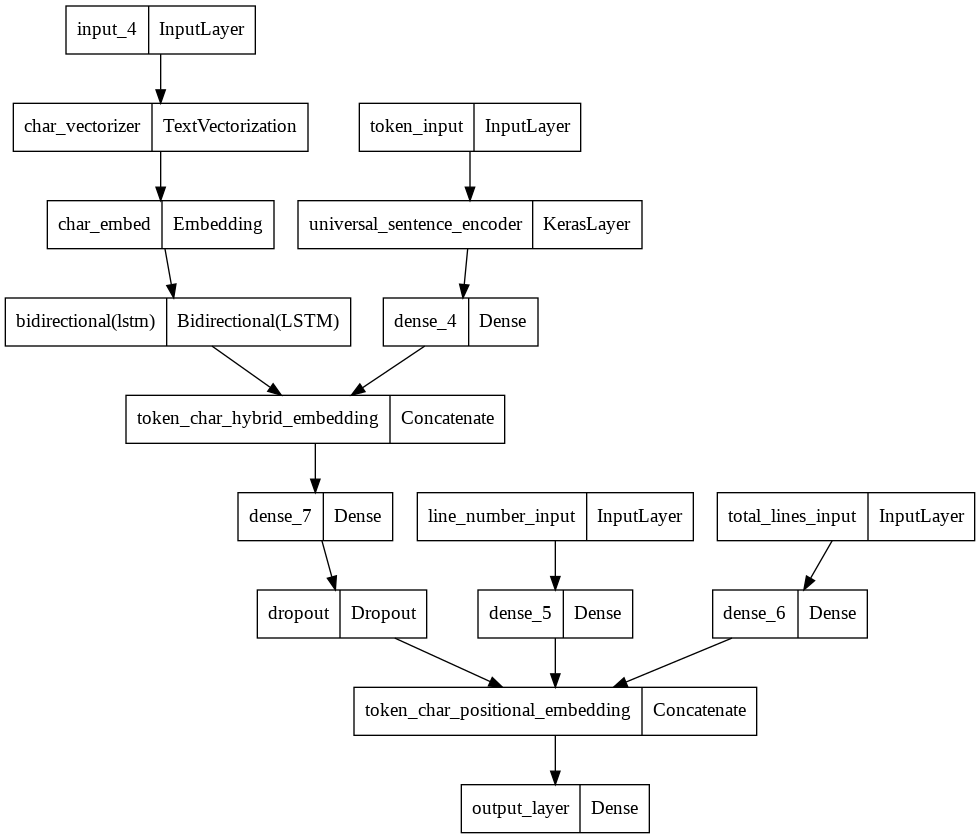

In [ ]:
# Plot the token, char, positional embedding model
from tensorflow.keras.utils import plot_model
plot_model(loaded_model)

Converting the Tfmodel to tflite model